# Baseline Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load the clean dataset
twitter_dataset = pd.read_csv('clean_tweeter_data.csv',index_col=0)
twitter_dataset.head()


/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [ ]:
print('Number of positve tweets:  {}'.format(len(twitter_dataset['target'][twitter_dataset.target == 1])))
print('Number of negative tweets: {}'.format(len(twitter_dataset['target'][twitter_dataset.target == 0])))
print('Total number of tweets:  {}'.format(twitter_dataset.shape[0]))


In [143]:

X = twitter_dataset.text
y = twitter_dataset.target


In [144]:
from sklearn.model_selection import train_test_split

# Train, Validation, and Test set : 98%, 2%, 2% 

X_train, X, y_train, y = train_test_split(X, y, test_size = 0.02, random_state = 101)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size = 0.5, random_state = 101)


In [89]:
print ('Train set has {0} tweets with {1:.2f}% positive and {2:.2f}% negative sentiments'.format(len(X_train),
    (len(X_train[y_train == 1]) / (len(X_train)*1.))*100, 
    (len(X_train[y_train == 0]) / (len(X_train)*1.))*100))

print('Validation set has {0} tweets with {1:.2f}% positive and {2:.2f}% negative sentiments'.format(len(X_val), 
    (len(X_val[y_val == 1]) / (len(X_val)*1.))*100,
    (len(X_val[y_val == 0]) / (len(X_val)*1.))*100 ))

print('Test set has {0} tweets with {1:.2f}% positive and {2:.2f}% negative sentiments'.format(len(X_test), 
    (len(X_test[y_test == 1]) / (len(X_test)*1.))*100,
    (len(X_test[y_test == 0]) / (len(X_test)*1.))*100 ))



Train set has 1564120 tweets with 49.98% positive and 50.02% negative sentiments
Validation set has 15960 tweets with 50.27% positive and 49.73% negative sentiments
Test set has 15961 tweets with 50.68% positive and 49.32% negative sentiments


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

def accuracy_summary(Pipeline, X_train, y_train, X_test, y_test):

    sentiment_fit = Pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy



In [17]:
from sklearn.metrics import confusion_matrix, classification_report

def train_test_and_evaluate(Pipeline, X_train, y_train, X_test, y_test):

    sentiment_fit = Pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_mat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conf_mat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    print ("-"*80)
    print ("Confusion Matrix\n")
    print (confusion)
    print ("-"*80)
    print ("Classification Report\n")
    print (classification_report(y_test, y_pred, target_names=['negative','positive']))



In [7]:
# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

count_vec = CountVectorizer()
classifier = LogisticRegression()
n_features = np.arange(10000,100001,10000)


In [8]:
def nfeature_accuracy_checker(vectorizer=count_vec, n_features=n_features, stop_words=None, 
                              ngram_range=(1, 1), classifier=classifier):
    
    result = []
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([('vectorizer', vectorizer),('classifier', classifier)])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_val, y_val)
        result.append((n,nfeature_accuracy))
    return result


In [9]:
term_freq_df = pd.read_csv('term_freq_df.csv',index_col=0)
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]



,negative,positive,total
to,313162,252567,565729
the,257836,265998,523834
my,190775,125955,316730
it,157448,147786,305234
and,153958,149642,303600
you,103844,198245,302089
not,194724,86861,281585
is,133432,111191,244623
in,115542,101160,216702
for,98999,117369,216368


In [10]:
my_stop_words = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))
my_stop_words


frozenset({'and', 'for', 'in', 'is', 'it', 'my', 'not', 'the', 'to', 'you'})

In [13]:
print ("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')
print ("________________________________________________")
print ("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()
print ("________________________________________________")
print ("RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)\n")
feature_result_wocsw = nfeature_accuracy_checker(stop_words=my_stop_words)



RESULT FOR UNIGRAM WITHOUT STOP WORDS

Validation result for 10000 features
accuracy score: 77.53%
Validation result for 20000 features
accuracy score: 77.73%
Validation result for 30000 features
accuracy score: 77.76%
Validation result for 40000 features
accuracy score: 77.74%
Validation result for 50000 features
accuracy score: 77.71%
Validation result for 60000 features
accuracy score: 77.78%
Validation result for 70000 features
accuracy score: 77.80%
Validation result for 80000 features
accuracy score: 77.79%
Validation result for 90000 features
accuracy score: 77.81%
Validation result for 100000 features
accuracy score: 77.88%
________________________________________________
RESULT FOR UNIGRAM WITH STOP WORDS

Validation result for 10000 features
accuracy score: 80.15%
Validation result for 20000 features
accuracy score: 80.26%
Validation result for 30000 features
accuracy score: 80.38%
Validation result for 40000 features
accuracy score: 80.26%
Validation result for 50000 feature

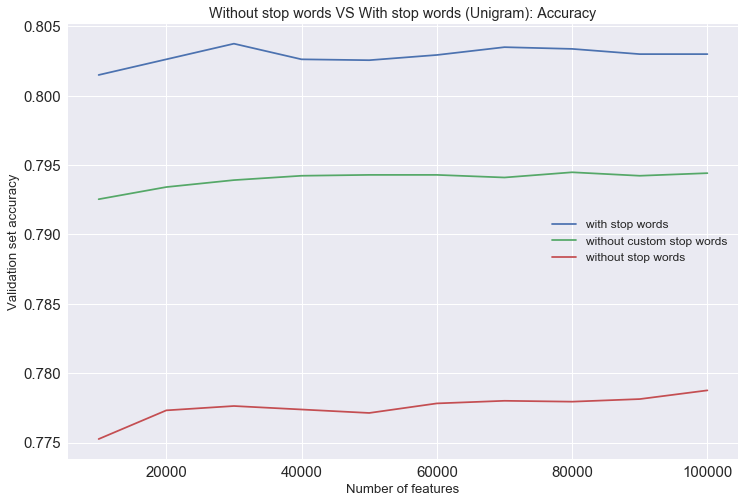

In [19]:
with_stop_words = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy'])
without_custom_stop_words = pd.DataFrame(feature_result_wocsw,columns=['nfeatures','validation_accuracy'])
without_stop_words = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy'])
sns.set(font_scale=1.2)
plt.figure(figsize=(12,8))
plt.plot(with_stop_words.nfeatures, with_stop_words.validation_accuracy, label='with stop words')
plt.plot(without_custom_stop_words.nfeatures, without_custom_stop_words.validation_accuracy,label='without custom stop words')
plt.plot(without_stop_words.nfeatures, without_stop_words.validation_accuracy,label='without stop words')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()
plt.savefig('unigram.png', bbox_inches='tight')
plt.show()


In [20]:
print ("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(ngram_range=(1, 2))
print ("________________________________________________")
print ("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(ngram_range=(1, 3))



RESULT FOR BIGRAM WITH STOP WORDS

Validation result for 10000 features
accuracy score: 80.90%
Validation result for 20000 features
accuracy score: 81.67%
Validation result for 30000 features
accuracy score: 81.84%
Validation result for 40000 features
accuracy score: 81.95%
Validation result for 50000 features
accuracy score: 81.89%
Validation result for 60000 features
accuracy score: 81.90%
Validation result for 70000 features
accuracy score: 81.94%
Validation result for 80000 features
accuracy score: 82.03%
Validation result for 90000 features
accuracy score: 81.94%
Validation result for 100000 features
accuracy score: 81.84%
________________________________________________
RESULT FOR TRIGRAM WITH STOP WORDS

Validation result for 10000 features
accuracy score: 81.03%
Validation result for 20000 features
accuracy score: 81.79%
Validation result for 30000 features
accuracy score: 81.81%
Validation result for 40000 features
accuracy score: 82.02%
Validation result for 50000 features
ac

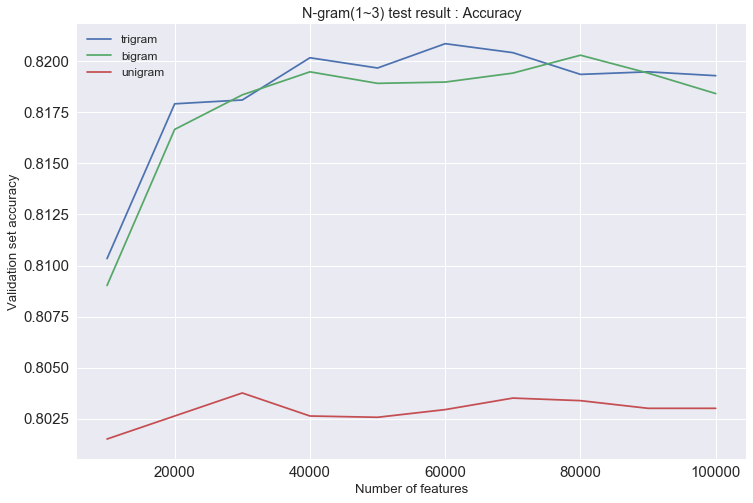

In [21]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy'])
sns.set(font_scale=1.2)
plt.figure(figsize=(12,8))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()
plt.savefig('unigram bigram trigram.png', bbox_inches='tight')
plt.show()


In [22]:
tg_count_vec = CountVectorizer(max_features=60000,ngram_range=(1, 3))
tg_pipeline = Pipeline([('vectorizer', tg_count_vec),('classifier', classifier)])
train_test_and_evaluate(tg_pipeline, X_train, y_train, X_val, y_val)


accuracy score: 82.09%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                6328                1609
positive                1250                6773
--------------------------------------------------------------------------------
Classification Report

             precision    recall  f1-score   support

   negative       0.84      0.80      0.82      7937
   positive       0.81      0.84      0.83      8023

avg / total       0.82      0.82      0.82     15960



In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()

feature_result_ugt = nfeature_accuracy_checker(vectorizer=tf_idf)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tf_idf,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tf_idf,ngram_range=(1, 3))



Validation result for 10000 features
accuracy score: 80.28%
Validation result for 20000 features
accuracy score: 80.44%
Validation result for 30000 features
accuracy score: 80.52%
Validation result for 40000 features
accuracy score: 80.43%
Validation result for 50000 features
accuracy score: 80.48%
Validation result for 60000 features
accuracy score: 80.45%
Validation result for 70000 features
accuracy score: 80.46%
Validation result for 80000 features
accuracy score: 80.48%
Validation result for 90000 features
accuracy score: 80.46%
Validation result for 100000 features
accuracy score: 80.48%
Validation result for 10000 features
accuracy score: 81.14%
Validation result for 20000 features
accuracy score: 81.77%
Validation result for 30000 features
accuracy score: 82.09%
Validation result for 40000 features
accuracy score: 82.31%
Validation result for 50000 features
accuracy score: 82.31%
Validation result for 60000 features
accuracy score: 82.39%
Validation result for 70000 features
ac

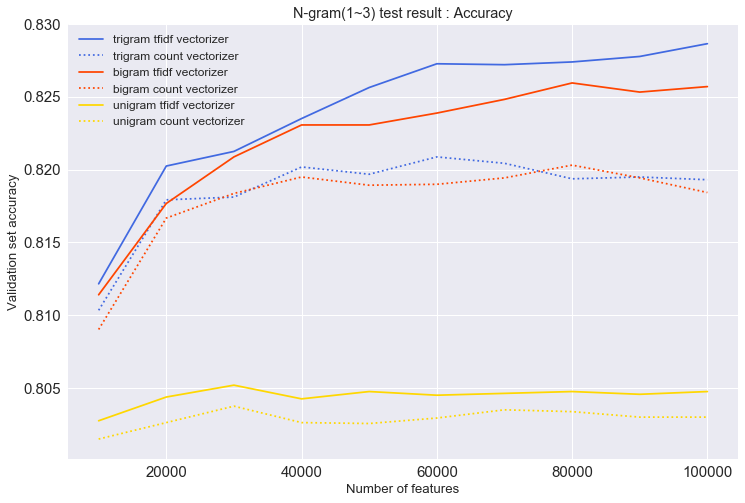

In [24]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy'])
sns.set(font_scale=1.2)
plt.figure(figsize=(12,8))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()
plt.savefig('tfidf vs countvectorizer.png', bbox_inches='tight')
plt.show()



In [25]:
tg_tfidf_vec = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
tg_pipeline = Pipeline([('vectorizer', tg_tfidf_vec),('classifier', classifier)
    ])
train_test_and_evaluate(tg_pipeline, X_train, y_train, X_val, y_val)



accuracy score: 82.86%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_negative  predicted_positive
negative                6463                1474
positive                1261                6762
--------------------------------------------------------------------------------
Classification Report

             precision    recall  f1-score   support

   negative       0.84      0.81      0.83      7937
   positive       0.82      0.84      0.83      8023

avg / total       0.83      0.83      0.83     15960



In [26]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
              ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tf_idf = TfidfVectorizer()
def classifier_comparator(vectorizer=tf_idf, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)])
        print ("Validation result for {}".format(n))
        print (c)
        clf_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_val, y_val)
        result.append((n,clf_accuracy))
    return result

trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))




/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
accuracy score: 82.86%
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
accuracy score: 82.21%
Validation result for LinearSVC with L1-based feature selection
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
        norm_order=1, prefit...ax_it

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy score: 76.51%
Validation result for Passive-Aggresive
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=None, n_iter=None,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False)


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy score: 79.72%
Validation result for Nearest Centroid
NearestCentroid(metric='euclidean', shrink_threshold=None)
accuracy score: 72.91%


In [27]:
# Top 5 classifiers
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], 
                      ['Logistic Regression', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Passive Aggresive Classifier', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=100000,ngram_range=(1, 3))),
            ('classifier', clf)])
    print ("Validation result for {}".format(label))
    print (clf)
    clf_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_val, y_val)
    


Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
accuracy score: 82.86%
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
accuracy score: 82.21%
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
accuracy score: 80.48%
Validation result for Ridge Classifier
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
accuracy score: 82.30%
Validation result for Passive Aggresive Classi

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy score: 79.61%
Validation result for Ensemble
VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('svc', Linear...   n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


accuracy score: 82.38%


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [176]:
from nltk.tokenize import TweetTokenizer # a tweet tokenizer from nltk.
tokenizer = TweetTokenizer()

def tokenize(tweet):
    
    tokens = tokenizer.tokenize(tweet)

    return tokens


In [175]:
twitter_dataset.head()

,text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [178]:
twitter_dataset['token'] = twitter_dataset['text'].progress_map(tokenize)







progress-bar:   0%|          | 0/1596041 [00:00<?, ?it/s]




progress-bar:   0%|          | 1205/1596041 [00:00<02:12, 12049.98it/s]




progress-bar:   0%|          | 3691/1596041 [00:00<01:51, 14252.67it/s]




progress-bar:   0%|          | 6457/1596041 [00:00<01:35, 16677.74it/s]




progress-bar:   1%|          | 8995/1596041 [00:00<01:25, 18589.20it/s]




progress-bar:   1%|          | 11548/1596041 [00:00<01:18, 20239.64it/s]




progress-bar:   1%|          | 14334/1596041 [00:00<01:11, 22048.34it/s]




progress-bar:   1%|          | 16887/1596041 [00:00<01:08, 22987.93it/s]




progress-bar:   1%|          | 19592/1596041 [00:00<01:05, 24070.41it/s]




progress-bar:   1%|▏         | 22302/1596041 [00:00<01:03, 24904.06it/s]




progress-bar:   2%|▏         | 24837/1596041 [00:01<01:03, 24896.92it/s]




progress-bar:   2%|▏         | 27368/1596041 [00:01<01:02, 25018.37it/s]




progress-bar:   2%|▏         | 29981/1596041 [00:01<01:01, 25340.84it/s]




progress-bar:

progress-bar:  29%|██▉       | 461025/1596041 [00:17<00:44, 25326.95it/s]




progress-bar:  29%|██▉       | 463592/1596041 [00:17<00:44, 25424.91it/s]




progress-bar:  29%|██▉       | 466147/1596041 [00:18<00:44, 25246.35it/s]




progress-bar:  29%|██▉       | 468820/1596041 [00:18<00:43, 25671.94it/s]




progress-bar:  30%|██▉       | 471412/1596041 [00:18<00:43, 25743.56it/s]




progress-bar:  30%|██▉       | 474033/1596041 [00:18<00:43, 25878.90it/s]




progress-bar:  30%|██▉       | 476699/1596041 [00:18<00:42, 26107.47it/s]




progress-bar:  30%|███       | 479424/1596041 [00:18<00:42, 26437.81it/s]




progress-bar:  30%|███       | 482111/1596041 [00:18<00:41, 26561.58it/s]




progress-bar:  30%|███       | 484770/1596041 [00:18<00:41, 26551.87it/s]




progress-bar:  31%|███       | 487485/1596041 [00:18<00:41, 26723.22it/s]




progress-bar:  31%|███       | 490298/1596041 [00:18<00:40, 27127.74it/s]




progress-bar:  31%|███       | 493014/1596041 [00:19<00:41, 2682

progress-bar:  55%|█████▌    | 885514/1596041 [00:35<00:31, 22513.07it/s]




progress-bar:  56%|█████▌    | 887827/1596041 [00:35<00:31, 22692.27it/s]




progress-bar:  56%|█████▌    | 890263/1596041 [00:36<00:30, 23167.17it/s]




progress-bar:  56%|█████▌    | 892649/1596041 [00:36<00:30, 23370.50it/s]




progress-bar:  56%|█████▌    | 895088/1596041 [00:36<00:29, 23666.46it/s]




progress-bar:  56%|█████▌    | 897459/1596041 [00:36<00:29, 23632.90it/s]




progress-bar:  56%|█████▋    | 899835/1596041 [00:36<00:29, 23666.85it/s]




progress-bar:  57%|█████▋    | 902220/1596041 [00:36<00:29, 23713.22it/s]




progress-bar:  57%|█████▋    | 904593/1596041 [00:36<00:29, 23373.57it/s]




progress-bar:  57%|█████▋    | 906933/1596041 [00:36<00:29, 23346.73it/s]




progress-bar:  57%|█████▋    | 909493/1596041 [00:36<00:28, 23973.53it/s]




progress-bar:  57%|█████▋    | 911896/1596041 [00:36<00:28, 23592.04it/s]




progress-bar:  57%|█████▋    | 914269/1596041 [00:37<00:28, 2363

progress-bar:  83%|████████▎ | 1331207/1596041 [00:53<00:10, 25239.36it/s]




progress-bar:  84%|████████▎ | 1333753/1596041 [00:53<00:10, 24806.54it/s]




progress-bar:  84%|████████▎ | 1336457/1596041 [00:54<00:10, 25434.70it/s]




progress-bar:  84%|████████▍ | 1339021/1596041 [00:54<00:10, 25493.91it/s]




progress-bar:  84%|████████▍ | 1341671/1596041 [00:54<00:09, 25784.90it/s]




progress-bar:  84%|████████▍ | 1344261/1596041 [00:54<00:09, 25817.45it/s]




progress-bar:  84%|████████▍ | 1346955/1596041 [00:54<00:09, 26142.15it/s]




progress-bar:  85%|████████▍ | 1349620/1596041 [00:54<00:09, 26290.13it/s]




progress-bar:  85%|████████▍ | 1352253/1596041 [00:54<00:09, 26259.10it/s]




progress-bar:  85%|████████▍ | 1355043/1596041 [00:54<00:09, 26729.96it/s]




progress-bar:  85%|████████▌ | 1357923/1596041 [00:54<00:08, 27316.71it/s]




progress-bar:  85%|████████▌ | 1360809/1596041 [00:54<00:08, 27761.54it/s]




progress-bar:  85%|████████▌ | 1363592/1596041 [00:5

In [179]:
twitter_dataset.head()

,text,target,token
0,awww that bummer you shoulda got david carr of...,0,"[awww, that, bummer, you, shoulda, got, david,..."
1,is upset that he can not update his facebook b...,0,"[is, upset, that, he, can, not, update, his, f..."
2,dived many times for the ball managed to save ...,0,"[dived, many, times, for, the, ball, managed, ..."
3,my whole body feels itchy and like its on fire,0,"[my, whole, body, feels, itchy, and, like, its..."
4,no it not behaving at all mad why am here beca...,0,"[no, it, not, behaving, at, all, mad, why, am,..."


In [183]:

X_train_wv, X_wv, y_train_wv, y_wv = train_test_split(np.array(twitter_dataset.token), 
                                                      np.array(twitter_dataset.target), 
                                                      test_size=0.02, random_state = 101)



X_val_wv, X_test_wv, y_val_wv, y_wv = train_test_split(X_wv,
                                                       y_wv, 
                                                       test_size=0.5, random_state = 101)


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

def review_wordlist(review, remove_stopwords=False):
    
    # Tokenize tweets
    words = word_tokenize(review)
    # Optionally remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))     
        words = [w for w in words if not w in stops]
    
    return(words)


In [164]:
clean_test_reviews = []
for review in X_test:
    clean_test_reviews.append(review_wordlist(review,remove_stopwords=False))

clean_val_reviews = []
for review in X_val:
    clean_val_reviews.append(review_wordlist(review,remove_stopwords=False))
    
clean_train_reviews = []
for review in X_train:
    clean_train_reviews.append(review_wordlist(review,remove_stopwords=False))
    

In [79]:
import gensim
from tqdm import tqdm
#tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

# Before feeding lists of tokens into the word2vec model, 
# we must turn them into LabeledSentence objects beforehand

def labelizeTweets(tweets, label_type):
    labelized = []
    for i,v in tqdm(enumerate(tweets)):
        label = '%s_%s'%(label_type,i)
        labelized.append(LabeledSentence(v, [label]))
    return labelized




In [184]:
X_train_wv = labelizeTweets(X_train_wv, 'TRAIN')
X_val_wv = labelizeTweets(X_val_wv, 'VAL')
X_test_wv = labelizeTweets(X_test_wv, 'TEST')







0it [00:00, ?it/s]/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  





22767it [00:00, 225948.52it/s]




45302it [00:00, 225623.44it/s]




71126it [00:00, 236695.44it/s]




95107it [00:00, 237468.93it/s]




119329it [00:00, 238413.35it/s]




143123it [00:00, 238210.86it/s]




168675it [00:00, 240755.50it/s]




194445it [00:00, 242901.42it/s]




218860it [00:00, 243033.02it/s]




242975it [00:01, 242821.12it/s]




267453it [00:01, 243008.33it/s]




293914it [00:01, 244819.37it/s]




318686it [00:01, 243782.40it/s]




342996it [00:01, 243680.25it/s]




368639it [00:01, 244486.55it/s]




393331it [00:01, 244543.02it/s]




418279it [00:01, 244833.54it/s]




443002it [00:01, 244096.41it/s]




467278it [00:01, 243943.29it/s]




467278it [03:16, 2380.52it/s]  




471001it [03:16, 2392.41it/s]




487891it [03:16, 2476.

In [185]:
X_train_wv[0]


LabeledSentence(words=['did', 'until', 'last', 'week', 'will', 'put', 'my', 'late', 'great', 'kitty', 'back', 'up', 'soon', 'he', 'was', 'snugglebug', 'but', 'died', 'few', 'months', 'ago'], tags=['TRAIN_0'])

In [165]:
X_train_ls = labelizeTweets(clean_train_reviews, 'TRAIN')
X_val_ls = labelizeTweets(clean_val_reviews, 'VAL')
X_test_ls = labelizeTweets(clean_test_reviews, 'TEST')





0it [00:00, ?it/s]/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  



22801it [00:00, 226514.81it/s]


48244it [00:00, 240583.54it/s]


74468it [00:00, 247516.98it/s]


101192it [00:00, 252681.13it/s]


126633it [00:00, 252790.23it/s]


153765it [00:00, 256076.41it/s]


181192it [00:00, 258547.26it/s]


206849it [00:00, 258404.55it/s]


233024it [00:00, 258774.93it/s]


258216it [00:01, 257717.56it/s]


284889it [00:01, 258512.92it/s]


311444it [00:01, 259117.08it/s]


339088it [00:01, 260442.39it/s]


366935it [00:01, 261670.44it/s]


393765it [00:01, 261962.84it/s]


420507it [00:01, 261276.30it/s]


446783it [00:01, 260646.96it/s]


472699it [00:01, 259604.62it/s]


498272it [00:01, 259377.48it/s]


524188it [00:02, 259425.16it/s]


550251it [00:02, 259487.12it/s]


575998it [00:02, 256736.33it/s]


600307it [00:02, 254410.25it/s]

In [166]:
X_train_ls[0]


LabeledSentence(words=['did', 'until', 'last', 'week', 'will', 'put', 'my', 'late', 'great', 'kitty', 'back', 'up', 'soon', 'he', 'was', 'snugglebug', 'but', 'died', 'few', 'months', 'ago'], tags=['TRAIN_0'])

In [174]:
from gensim.models.word2vec import Word2Vec

# initialize the model
model_ug_cbow = Word2Vec( workers = 5, # Number of parallel threads
                          size = 200, # Word vector dimensionality
                          min_count= 2, # Minimum word count
                          window= 5, # Context window size
                          sample= 1e-3) # Downsample setting for frequent words

# create vocab
model_ug_cbow.build_vocab([x.words for x in tqdm(X_train_ls)])
# train the model
model_ug_cbow.train([x.words for x in tqdm(X_train_ls)])





  0%|          | 0/1564120 [00:00<?, ?it/s]



 12%|█▏        | 184068/1564120 [00:00<00:00, 1825928.23it/s]



 24%|██▎       | 369326/1564120 [00:00<00:00, 1837582.51it/s]



 34%|███▎      | 525391/1564120 [00:00<00:00, 1748267.78it/s]



 47%|████▋     | 742404/1564120 [00:00<00:00, 1853263.45it/s]



 62%|██████▏   | 973303/1564120 [00:00<00:00, 1944654.07it/s]



 77%|███████▋  | 1198906/1564120 [00:00<00:00, 1995218.15it/s]



 92%|█████████▏| 1432069/1564120 [00:00<00:00, 2044285.78it/s]



100%|██████████| 1564120/1564120 [00:00<00:00, 2069503.62it/s]



  0%|          | 0/1564120 [00:00<?, ?it/s]



 16%|█▌        | 252963/1564120 [00:00<00:00, 2517424.32it/s]



 34%|███▎      | 524607/1564120 [00:00<00:00, 2616534.06it/s]



 52%|█████▏    | 805899/1564120 [00:00<00:00, 2681888.64it/s]



 71%|███████   | 1107377/1564120 [00:00<00:00, 2764627.08it/s]



 91%|█████████ | 1417808/1564120 [00:00<00:00, 2832818.51it/s]



100%|██████████| 1564120/1564120 [00:00<00:00, 28638

ValueError: You must specify either total_examples or total_words, for proper job parameters updationand progress calculations. The usual value is total_examples=model.corpus_count.

In [186]:
from gensim.models.word2vec import Word2Vec

# initialize the model
model_ug_cbow = Word2Vec( workers = 5, # Number of parallel threads
                          size = 200, # Word vector dimensionality
                          min_count= 2, # Minimum word count
                          window= 5, # Context window size
                          sample= 1e-3) # Downsample setting for frequent words

# create vocab
model_ug_cbow.build_vocab([x.words for x in tqdm(X_train_wv)])
# train the model
model_ug_cbow.train([x.words for x in tqdm(X_train_wv)])







  0%|          | 0/1564120 [00:00<?, ?it/s]




 10%|█         | 157852/1564120 [00:00<00:00, 1570448.91it/s]




 21%|██        | 322728/1564120 [00:00<00:00, 1609455.11it/s]




 30%|██▉       | 468377/1564120 [00:00<00:00, 1557440.95it/s]




 40%|████      | 631471/1564120 [00:00<00:00, 1576262.54it/s]




 54%|█████▎    | 838697/1564120 [00:00<00:00, 1675668.12it/s]




 67%|██████▋   | 1054683/1564120 [00:00<00:00, 1756295.05it/s]




 81%|████████▏ | 1271294/1564120 [00:00<00:00, 1814731.71it/s]




 96%|█████████▌| 1495070/1564120 [00:00<00:00, 1867585.85it/s]




100%|██████████| 1564120/1564120 [00:00<00:00, 1869903.26it/s]




  0%|          | 0/1564120 [00:00<?, ?it/s]




 11%|█         | 173779/1564120 [00:00<00:00, 1728920.96it/s]




 23%|██▎       | 361976/1564120 [00:00<00:00, 1799631.34it/s]




 36%|███▌      | 560450/1564120 [00:00<00:00, 1864674.10it/s]




 50%|████▉     | 774766/1564120 [00:00<00:00, 1933879.53it/s]




 64%|██████▍   | 1003118/1564120 [00:

ValueError: You must specify either total_examples or total_words, for proper job parameters updationand progress calculations. The usual value is total_examples=model.corpus_count.

In [187]:
model_ug_cbow['awful']

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-1.8113300e-03, -9.9038218e-05, -1.0425750e-03, -1.7819942e-03,
       -2.3050364e-03,  8.5843890e-04,  1.3867482e-03, -1.6127325e-03,
        2.0728181e-03, -1.6870173e-03,  1.0041206e-03,  1.7646041e-03,
       -1.5570531e-03, -2.4540550e-03, -1.1691395e-03,  1.2192472e-03,
       -1.2805684e-03,  9.9237415e-04, -2.3248089e-03, -2.4972002e-03,
        6.8205170e-04, -3.7867660e-05, -6.4562482e-04, -1.5486780e-03,
        1.7600476e-03,  1.4845735e-03, -1.6629311e-03, -1.6241511e-03,
       -1.8628302e-03,  8.6695352e-04,  1.5493295e-03,  1.7624828e-03,
       -4.1532578e-04, -1.0903367e-04,  1.6512988e-03,  1.5719534e-03,
        1.5558046e-03,  5.8867456e-04, -2.4342109e-03,  5.9766247e-04,
        5.6043180e-04,  1.1920406e-03,  1.7153013e-03,  1.3920404e-03,
       -2.3549807e-03, -4.3037333e-04,  2.3036576e-03, -5.2441121e-04,
        1.4459619e-03,  5.5612897e-04, -1.0139492e-03,  1.2891965e-03,
       -1.6828974e-03,  8.5788633e-04, -2.2312412e-03,  1.7830117e-03,
      

In [195]:
model_ug_cbow.most_similar('awful')

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('caffine', 0.29565712809562683),
 ('llegue', 0.2842380404472351),
 ('approach', 0.2734704613685608),
 ('alters', 0.27119117975234985),
 ('hypocrites', 0.26936113834381104),
 ('garda', 0.26421862840652466),
 ('labret', 0.2623163163661957),
 ('filippo', 0.2581427991390228),
 ('ubuntuone', 0.25777778029441833),
 ('upseting', 0.2555035948753357)]

In [28]:

from nltk.tokenize import sent_tokenize, word_tokenize

def review_wordlist(review, remove_stopwords=False):
    
    # Tokenize tweets
    words = word_tokenize(review)
    # Optionally remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))     
        words = [w for w in words if not w in stops]
    
    return(words)


In [29]:
# This function splits a review into sentences
def review_sentences(review, tokenizer, remove_stopwords=False):
    # Using nltk tokenizer
    raw_sentences = tokenizer(review.strip())
    sentences = []
    # Loop for each sentence
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(review_wordlist(raw_sentence, remove_stopwords))

    # This returns the list of lists
    return sentences


In [30]:
train_sentences = []

for review in X_train:
    train_sentences += review_sentences(review, sent_tokenize)
   

In [32]:
from gensim.models import word2vec

# CBOW
# train model
w2v_CBOW = word2vec.Word2Vec(train_sentences,
                          workers = 5, # Number of parallel threads
                          size = 200, # Word vector dimensionality
                          min_count= 2, # Minimum word count
                          window= 5, # Context window size
                          sample= 1e-3) # Downsample setting for frequent words



In [33]:
# summarize the loaded model
print(w2v_CBOW)


Word2Vec(vocab=105035, size=200, alpha=0.025)


In [34]:

# learned vocabulary of tokens (words)
words_cbow = list(w2v_CBOW.wv.vocab)
print(words_cbow[:20])


['did', 'until', 'last', 'week', 'will', 'put', 'my', 'late', 'great', 'kitty', 'back', 'up', 'soon', 'he', 'was', 'but', 'died', 'few', 'months', 'ago']


In [35]:
# review the embedded vector for a specific token
print(w2v_CBOW['awful'])


[-1.5049183e-01  3.2998511e-01  1.2881142e+00  1.2702999e-01
 -1.1029135e+00 -7.9786247e-01 -1.9484997e+00  1.6151090e+00
  8.6413436e-02  3.6588842e-01  1.4463066e+00  4.0325543e-01
 -1.1792645e+00 -1.1864476e+00 -1.6599383e+00  3.5773358e-01
 -1.4835536e-01  1.6017563e+00  1.8787794e+00 -3.4705922e-01
 -7.0292675e-01 -1.6926123e-01 -4.1275042e-01  1.5321057e+00
  1.0750500e+00 -7.4722838e-01 -1.8446316e+00  3.8045874e-01
 -5.2958810e-01  1.7904142e+00 -9.4541085e-01 -3.1570951e-03
  3.7086433e-01  1.5487199e-01  5.8398384e-01 -8.5928440e-01
  1.1757772e-01 -1.6256763e-01 -2.9773852e-01 -3.0872113e-01
 -4.3001515e-01  7.0269579e-01 -3.8099401e-03 -7.4409485e-01
  4.0438045e-03  5.5851346e-01 -9.3708408e-01  6.7597717e-01
 -1.5461920e-01  4.4560675e-02 -1.4758135e+00  2.4870682e-01
 -9.3943334e-01  1.5181726e+00  7.9365450e-01  9.1103864e-01
  2.9903173e-01  4.0475076e-01 -1.1403254e+00 -1.6269555e+00
  6.3848352e-01  9.2121385e-02 -7.2942179e-01  7.3541485e-02
 -4.1032207e-01  1.83566

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [36]:
# This will print the most similar words present in the model
w2v_CBOW.wv.most_similar("man")


[('dude', 0.6240137815475464),
 ('boy', 0.5780829191207886),
 ('guy', 0.5735411643981934),
 ('woman', 0.5132790803909302),
 ('girl', 0.4765700399875641),
 ('kid', 0.46707549691200256),
 ('men', 0.4430287480354309),
 ('fella', 0.43979448080062866),
 ('bastard', 0.43734872341156006),
 ('bloke', 0.43478646874427795)]

In [39]:
# compute similarity between two words
w2v_CBOW.wv.similarity(w1 = "awful", w2 = "terrible")


0.7851442951555183

In [41]:
# This will print the odd word among them 
w2v_CBOW.wv.doesnt_match("man woman girl boy kitchen".split())


'kitchen'

In [42]:
# This will give the total number of words in the vocabolary created from this dataset
w2v_CBOW.wv.syn0.shape


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


(105035, 200)

In [43]:
# Save the model in a binary format
w2v_CBOW.wv.save_word2vec_format('w2v_CBOW.bin')
# Load the model
# w2v_CBOW = Word2Vec.load('w2v_CBOW.bin')


In [44]:
# Save the model in ASCII format
w2v_CBOW.wv.save_word2vec_format('w2v_CBOW.txt', binary=False)


In [45]:
# Visualize Word Embedding
# retrieve all of the vectors from the trained model
X_vec_cbow = w2v_CBOW[w2v_CBOW.wv.vocab]



/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
# create a 2-dimensional PCA model of the word vectors
from sklearn.decomposition import PCA
pca_cbow = PCA(n_components=2)
result_cbow = pca_cbow.fit_transform(X_vec_cbow[:20])


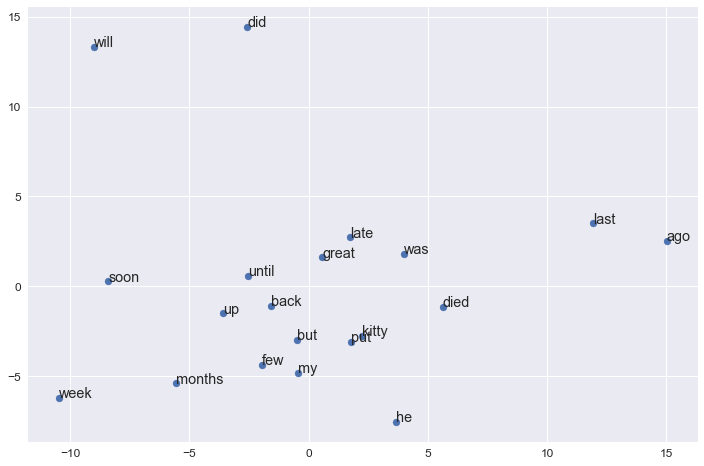

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the resulting projection
plt.scatter(result_cbow[:, 0], result_cbow[:, 1])

# annotate the points on the graph with the words themselves
words_cbow = list(w2v_CBOW.wv.vocab)
for i, word in enumerate(words_cbow[:20]):
    plt.annotate(word, xy=(result_cbow[i, 0], result_cbow[i, 1]))
plt.show()


In [53]:
# Skip-Gram
# train model
w2v_SG = word2vec.Word2Vec(train_sentences,
                          workers = 5, # Number of parallel threads
                          size = 200, # Word vector dimensionality
                          min_count= 2, # Minimum word count
                          window= 5, # Context window size
                          sample= 1e-3, # Downsample setting for frequent words
                          sg = 1) # Skip-Gram


In [54]:
# summarize the loaded model
print(w2v_SG)


Word2Vec(vocab=105035, size=200, alpha=0.025)


In [55]:
# learned vocabulary of tokens (words)
words_sg = list(w2v_SG.wv.vocab)
print(words_sg[:20])


['did', 'until', 'last', 'week', 'will', 'put', 'my', 'late', 'great', 'kitty', 'back', 'up', 'soon', 'he', 'was', 'but', 'died', 'few', 'months', 'ago']


In [56]:
# review the embedded vector for a specific token
print(w2v_SG['awful'])


[-0.06255947 -0.23070392  0.09993403  0.51364124 -0.45323092 -0.19732156
 -0.29735562  0.14919744  0.17057288  0.07360432  0.21912125 -0.2880764
 -0.140997    0.13335817  0.13062997 -0.25514278 -0.12957032  0.55985886
  0.30523637 -0.06979915 -0.3757465   0.2709972   0.12044251  0.13708766
  0.02591151 -0.7951817  -0.26104185  0.21507533  0.14815131  0.2546595
 -0.06933381 -0.2030796   0.02345619  0.2032611  -0.0168095   0.05604835
 -0.28335404 -0.38974684  0.09316334 -0.18558805  0.13759065 -0.3201437
 -0.18719995  0.13354354  0.21372326  0.35545394 -0.2470114  -0.06656018
 -0.3203941  -0.13120243  0.21034382 -0.014654    0.09572269  0.31699848
  0.23527692  0.1845207  -0.417487    0.15781435  0.15363261  0.09350928
  0.03557944  0.13751    -0.15814365 -0.11056419 -0.07911145  0.28834
 -0.14541878 -0.02528524 -0.3499814  -0.50163555  0.2383862   0.29349047
  0.17896926 -0.11388747 -0.14972268 -0.36198854  0.04644522 -0.15047814
 -0.13965724 -0.15398356 -0.12587304  0.09336691  0.14596

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [57]:
# This will print the most similar words present in the model
w2v_SG.wv.most_similar("man")


[('dude', 0.715873122215271),
 ('mannnn', 0.6921994090080261),
 ('lawd', 0.6585680842399597),
 ('guy', 0.632737934589386),
 ('awee', 0.6276341676712036),
 ('girl', 0.6129598617553711),
 ('goshh', 0.6126500368118286),
 ('brah', 0.609828770160675),
 ('boy', 0.6041160821914673),
 ('babe', 0.6040337681770325)]

In [58]:
# compute similarity between two words
w2v_SG.wv.similarity(w1 = "awful", w2 = "terrible")


0.7844216314255148

In [59]:
# This will print the odd word among them 
w2v_SG.wv.doesnt_match("man woman girl boy kitchen".split())



'kitchen'

In [60]:
# This will give the total number of words in the vocabolary created from this dataset
w2v_SG.wv.syn0.shape


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


(105035, 200)

In [61]:
# Save the model in a binary format
w2v_SG.wv.save_word2vec_format('w2v_SG.bin')
# Load the model
# w2v_SG = Word2Vec.load('w2v_SG.bin')


In [62]:
# Save the model in ASCII format
w2v_SG.wv.save_word2vec_format('w2v_SG.txt', binary=False)


In [63]:
# Visualize Word Embedding
# retrieve all of the vectors from the trained model
X_vec_sg = w2v_SG[w2v_SG.wv.vocab]


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
# create a 2-dimensional PCA model of the word vectors
pca_sg = PCA(n_components=2)
result_sg = pca_sg.fit_transform(X_vec_sg[:20])


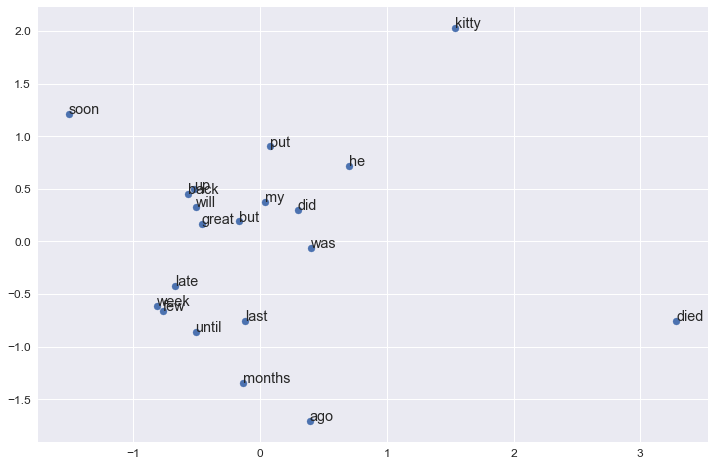

In [65]:
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the resulting projection
plt.scatter(result_sg[:, 0], result_sg[:, 1])

# annotate the points on the graph with the words themselves
words_sg = list(w2v_SG.wv.vocab)
for i, word in enumerate(words_sg[:20]):
    plt.annotate(word, xy=(result_sg[i, 0], result_sg[i, 1]))
plt.show()


In [149]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec




In [150]:
# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 10000th review
        if counter%100000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs



In [196]:
# Calculating average feature vector for training set
clean_train_reviews = []
for review in X_train:
    clean_train_reviews.append(review_wordlist(review, remove_stopwords=False))
    
trainDataVecs = getAvgFeatureVecs(clean_train_reviews, w2v_CBOW, num_features = 200)



Review 0 of 1564120


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


Review 100000 of 1564120
Review 200000 of 1564120
Review 300000 of 1564120
Review 400000 of 1564120
Review 500000 of 1564120
Review 600000 of 1564120
Review 700000 of 1564120
Review 800000 of 1564120
Review 900000 of 1564120
Review 1000000 of 1564120
Review 1100000 of 1564120
Review 1200000 of 1564120
Review 1300000 of 1564120
Review 1400000 of 1564120
Review 1500000 of 1564120


In [197]:
# Calculating average feature vactors for validation set     
clean_val_reviews = []
for review in X_val:
    clean_val_reviews.append(review_wordlist(review,remove_stopwords=False))
    
valDataVecs = getAvgFeatureVecs(clean_val_reviews, w2v_CBOW, num_features = 200)



Review 0 of 15960


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [198]:
# Calculating average feature vactors for test set     
clean_test_reviews = []
for review in X_test:
    clean_test_reviews.append(review_wordlist(review,remove_stopwords=False))
    
testDataVecs = getAvgFeatureVecs(clean_test_reviews, w2v_CBOW, num_features = 200)



Review 0 of 15961


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


In [ ]:
# Load Google’s Word2Vec Embedding
from gensim.models import KeyedVectors
# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
w2v_google = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = w2v_google.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)


In [ ]:
# Load Stanford’s GloVe Embedding
# https://nlp.stanford.edu/projects/glove/
# 2B tweets, 27B tokens, 1.2M vocab, uncased, 25d, 50d, 100d, & 200d vectors
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = 'glove.twitter.27B.200d.txt'
word2vec_output_file = 'glove.twitter.27B.200d.word2vec'
# create a copy of the GloVe model in word2vec format
glove2word2vec(glove_input_file, word2vec_output_file)



In [ ]:

from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = 'glove.twitter.27B.200d.word2vec'
w2v_glove = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = w2v_glove.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)
